In [6]:
!pip install missingno

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
You should consider upgrading via the '/Users/yazminrodriguez/DataBootcamp/bin/python -m pip install --upgrade pip' command.


In [7]:
%matplotlib inline


# Visualizations
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import csv
import missingno
import seaborn as sns

from sqlalchemy import create_engine

In [8]:
!pip install psycopg2

  Using cached psycopg2-2.9.1.tar.gz (379 kB)
    ERROR: Command errored out with exit status 1:
     command: /Users/yazminrodriguez/DataBootcamp/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zv/n9mv5kr16dd3t1_p78_h44qh0000gn/T/pip-install-5n34ah_z/psycopg2/setup.py'"'"'; __file__='"'"'/private/var/folders/zv/n9mv5kr16dd3t1_p78_h44qh0000gn/T/pip-install-5n34ah_z/psycopg2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/zv/n9mv5kr16dd3t1_p78_h44qh0000gn/T/pip-pip-egg-info-_el0l51v
         cwd: /private/var/folders/zv/n9mv5kr16dd3t1_p78_h44qh0000gn/T/pip-install-5n34ah_z/psycopg2/
    Complete output (23 lines):
    running egg_info
    creating /private/var/folders/zv/n9mv5kr16dd3t1_p78_h44qh0000gn/T/pip-pip-egg-info-_el0l51v/psycopg2.egg-info
    writing /private/var/folders/zv

## ETL Extraction files

In [12]:

gender_to_load = ("resources/gender_sub.csv")
gender_data= pd.read_csv(gender_to_load)

test_to_load= ("resources/test.csv")
test_data= pd.read_csv(test_to_load)

train_to_load= ("resources/train.csv")
train_data= pd.read_csv(train_to_load)

In [13]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train_data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# We use train_data due it holds the column survived
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
test_data.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Connect to local Database

In [17]:
# rds_connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"

rds_connection_string = "<localhost:5432>:<L1sta&B0n1ta>@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

## Check for tables

In [19]:
engine.table_names()

<ipython-input-19-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "<localhost"

(Background on this error at: http://sqlalche.me/e/14/e3q8)

## EDA (Exploratory Data Analysis)

In [63]:
# Data Descriptions
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

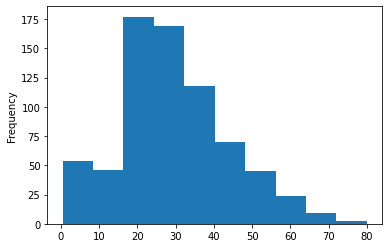

In [68]:
# Histogram to identify distribution of data on 'Age'

train_data.Age.plot.hist()  # Squew to the Right

<AxesSubplot:ylabel='Frequency'>

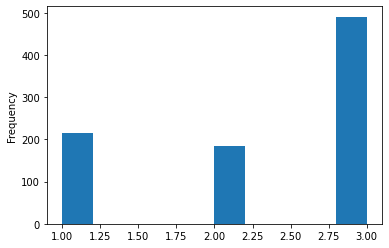

In [166]:
train_data.Pclass.plot.hist() 

##Knowing the empty values of the data will help the EDA and figuring out the Kind 
##of Data Cleaning required

<AxesSubplot:>

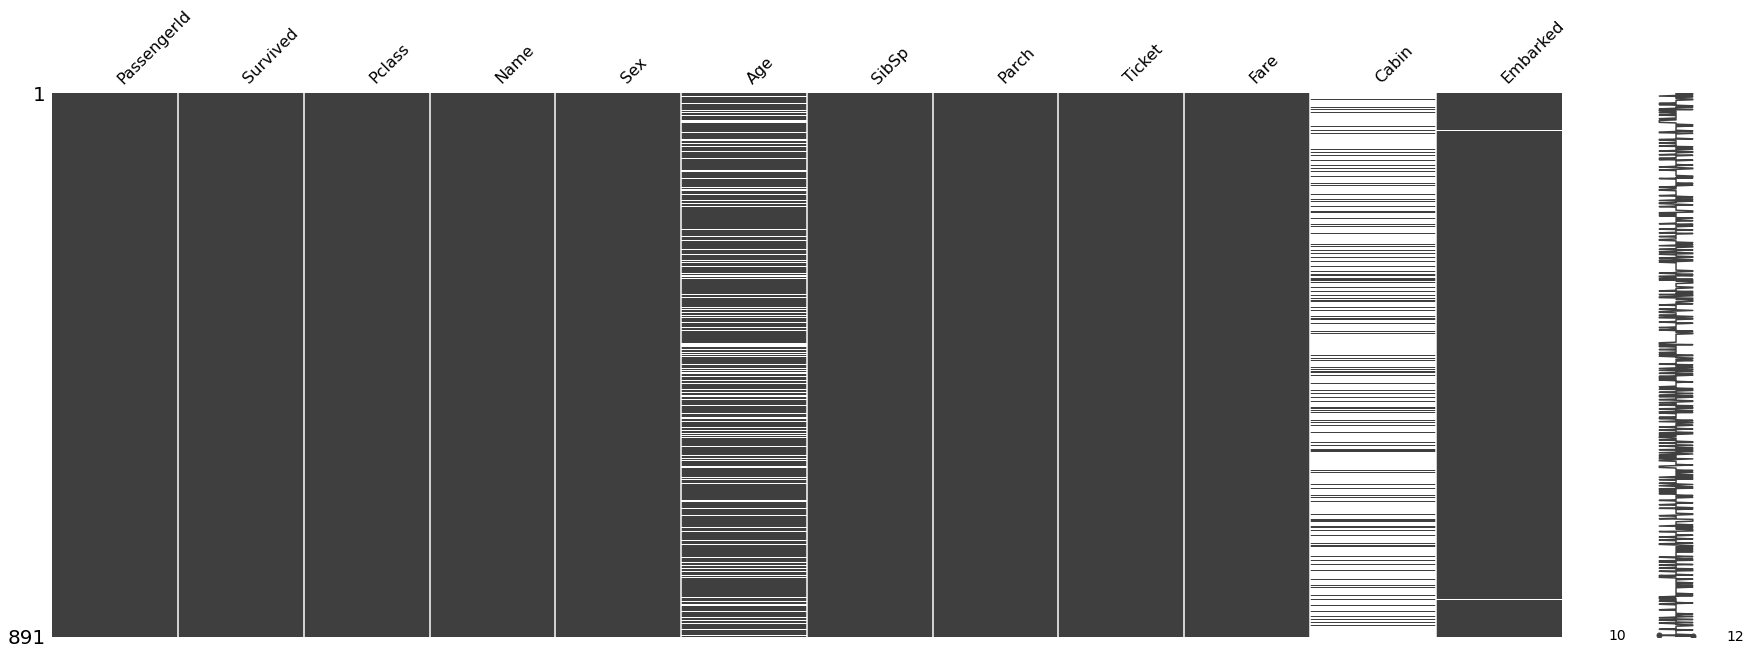

In [74]:
# Looking at the holes in the data
missingno.matrix(train_data, figsize= (30,10))  # From here we can see where the holes of the data are 
                                                # to focus on them - cabin- to recognize the Data Cleaning required
                                                

In [78]:
# To see the missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# Analysing Name column
train_data.Name.value_counts().head(15) #Name doesn´t have missing data
                                # -might be use surname to find couples of marriges -Mr & Mrs.

Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Leitch, Miss. Jessie Wills                         1
Johnson, Mr. Alfred                                1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")       1
Taussig, Miss. Ruth                                1
Name: Name, dtype: int64

In [108]:
names= pd.DataFrame(train_data.Name.str.split(",", 1).tolist(),
                  columns= ['last_name','first_name'])
names.head(20)

,last_name,first_name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
5,Moran,Mr. James
6,McCarthy,Mr. Timothy J
7,Palsson,Master. Gosta Leonard
8,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,Nasser,Mrs. Nicholas (Adele Achem)


In [182]:

names["names_duplicated"] = names.last_name.duplicated
names.names_duplicated.value_counts


<bound method IndexOpsMixin.value_counts of 0      <bound method Series.duplicated of 0         B...
1      <bound method Series.duplicated of 0         B...
2      <bound method Series.duplicated of 0         B...
3      <bound method Series.duplicated of 0         B...
4      <bound method Series.duplicated of 0         B...
                             ...                        
886    <bound method Series.duplicated of 0         B...
887    <bound method Series.duplicated of 0         B...
888    <bound method Series.duplicated of 0         B...
889    <bound method Series.duplicated of 0         B...
890    <bound method Series.duplicated of 0         B...
Name: names_duplicated, Length: 891, dtype: object>

<AxesSubplot:xlabel='count', ylabel='Sex'>

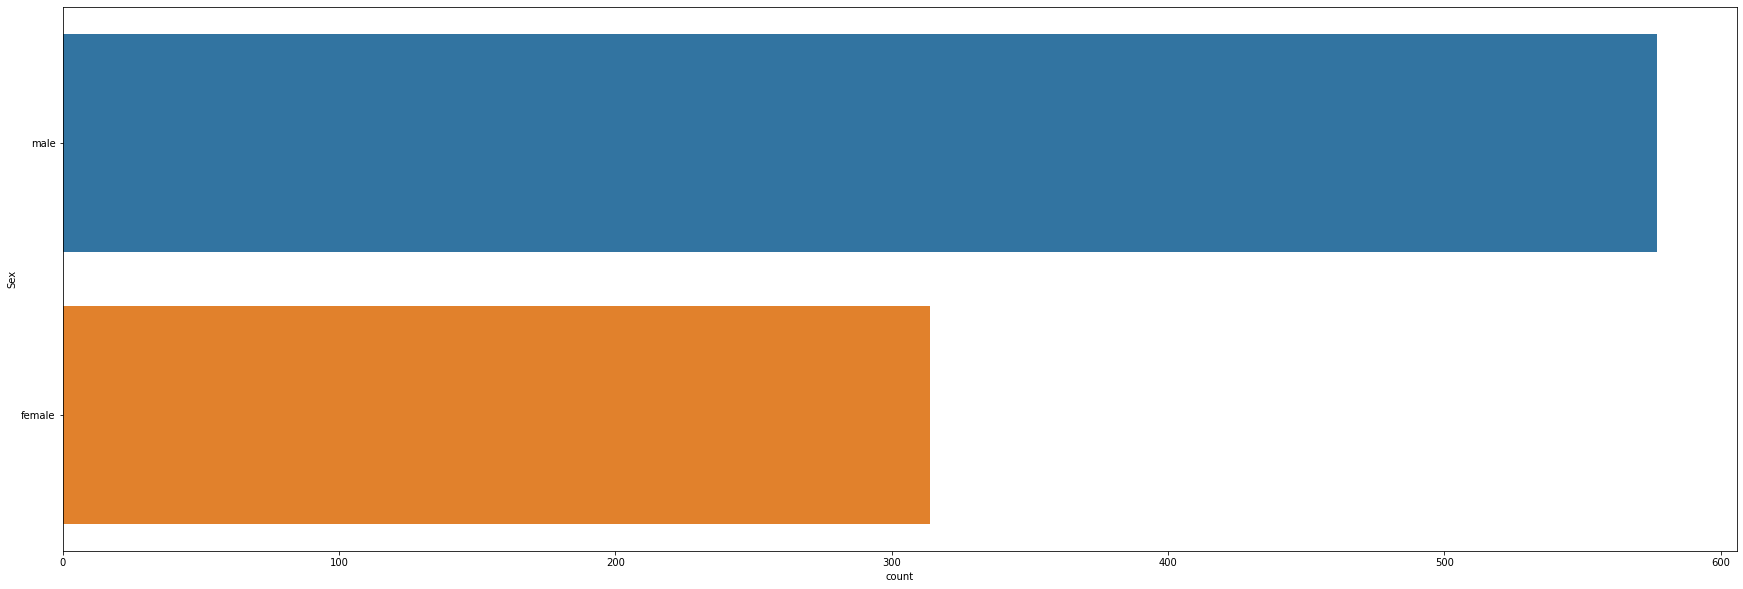

In [115]:
# Distribution of sex among the passengers
plt.figure(figsize=(30,10))
sns.countplot(y='Sex', data= train_data)

In [118]:
# Missing values in the sex column
train_data.Name.isnull().sum()  # Summarize the missing values

0

## Age analysis

In [123]:
# Missing values on age
train_data.Age.isnull().sum()

177

### What to do with the 177 missing values out of 891 values?
### - Replace them with the average age??
### - Erase them  from the data??
### - Pros & cons of these actions

In [126]:
bin_df= train_data[['PassengerId','Survived','Pclass','SibSp','Age','Sex','Name',]]

bin_df

,PassengerId,Survived,Pclass,SibSp,Age,Sex,Name
0,1,0,3,1,22.0,male,"Braund, Mr. Owen Harris"
1,2,1,1,1,38.0,female,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,0,26.0,female,"Heikkinen, Miss. Laina"
3,4,1,1,1,35.0,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,0,35.0,male,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,male,"Montvila, Rev. Juozas"
887,888,1,1,0,19.0,female,"Graham, Miss. Margaret Edith"
888,889,0,3,1,NaN,female,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,0,26.0,male,"Behr, Mr. Karl Howell"


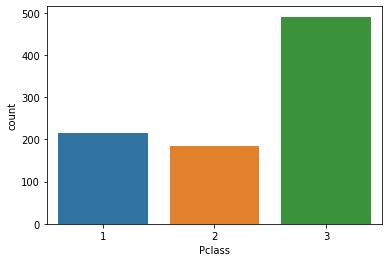

In [127]:
#Plot Pclass (category data)
plot= sns.countplot(x="Pclass", data= bin_df)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

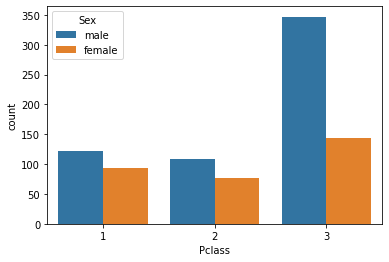

In [128]:
#Plot Pclass Per Sex (2 categories of data)
plot2= sns.countplot(x="Pclass", hue="Sex", data=bin_df)
plot2

<AxesSubplot:xlabel='count', ylabel='Survived'>

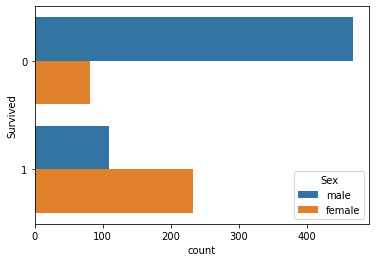

In [130]:
# Plotting on y axis 
plot3= sns.countplot(y="Survived" , hue="Sex", data=bin_df)
plot3

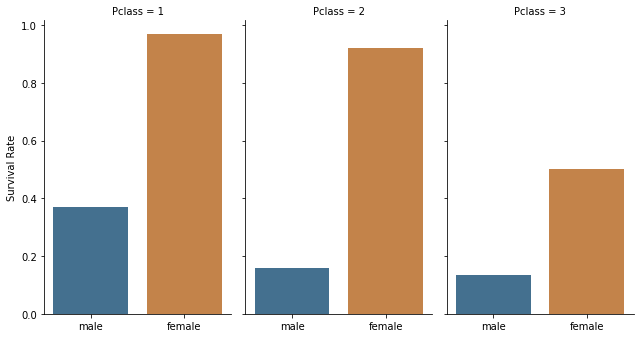

In [144]:
#Plot Pclass Per Sex Per Survivors(3 categories of data)

plot4=sns.catplot(x="Sex", y="Survived",col="Pclass",
                 data=bin_df, saturation=.5,
                 kind="bar", ci=None, aspect=.6)


(plot4.set_axis_labels("","Survival Rate"))


In [ ]:
# Using seaborn to plot 3 categories

g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
# This instruction is to set the axis labels of the plot "g"
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
<seaborn.axisgrid.FacetGrid object at 0x...>

In [175]:
# Distribution plot


plot4=sns.distplot(x)
plot4

NameError: name 'x' is not defined

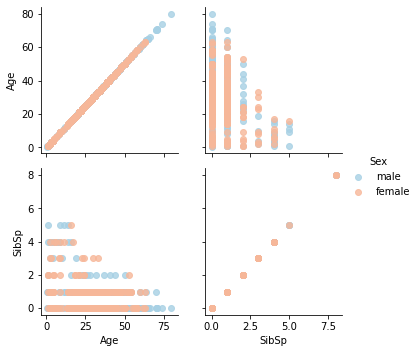

In [179]:
plot4= sns.PairGrid(bin_df, vars=["Age", "SibSp"],
                    hue= "Sex",palette='RdBu_r')
plot4.map(plt.scatter, alpha=0.8)
plot4.add_legend();




# Parch - Number of Parents/ Children the passenger has aboard 


In [186]:
# Counting number of values
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [188]:
#  Empty values
train_data.Parch.isnull().sum()

0

In [191]:
bin_df['Parch'] = train_data['Parch']
bin_df

/Users/yazminrodriguez/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,SibSp,Age,Sex,Name,Parch
0,1,0,3,1,22.0,male,"Braund, Mr. Owen Harris",0
1,2,1,1,1,38.0,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,3,1,3,0,26.0,female,"Heikkinen, Miss. Laina",0
3,4,1,1,1,35.0,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,5,0,3,0,35.0,male,"Allen, Mr. William Henry",0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,male,"Montvila, Rev. Juozas",0
887,888,1,1,0,19.0,female,"Graham, Miss. Margaret Edith",0
888,889,0,3,1,NaN,female,"Johnston, Miss. Catherine Helen ""Carrie""",2
889,890,1,1,0,26.0,male,"Behr, Mr. Karl Howell",0


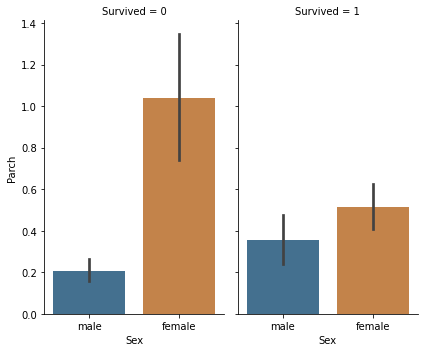

In [198]:
plot5= sns.catplot(x="Sex", y="Parch", col="Survived",
                  data=bin_df, saturation=.5,
                  kind="bar", aspect=.6)




## Visualizations of train__data distributions

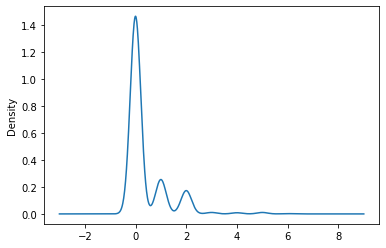

In [200]:
s= bin_df["Parch"]

plot5= s.plot.kde()



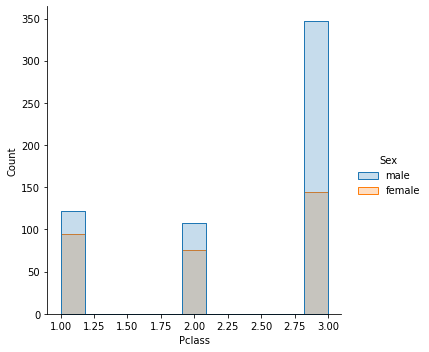

In [205]:
sns.displot(train_data, x= "Pclass", hue="Sex", element="step")

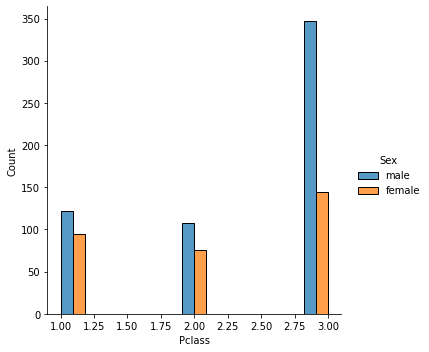

In [207]:
sns.displot(train_data, x= "Pclass", hue="Sex", multiple="dodge")

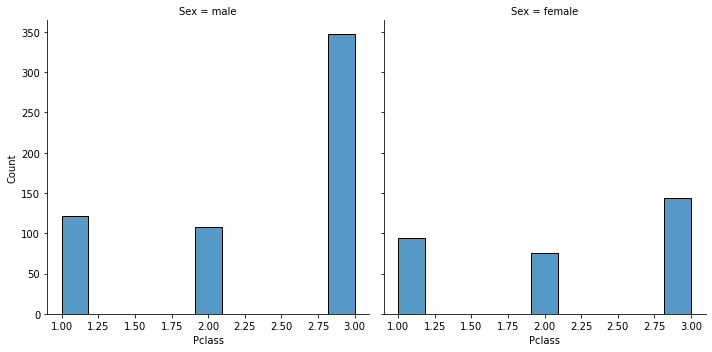

In [208]:
sns.displot(train_data, x= "Pclass", col="Sex")

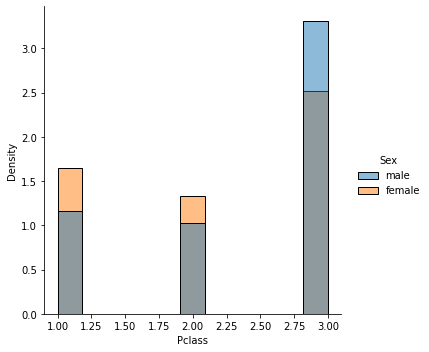

In [211]:
sns.displot(train_data, x= "Pclass", hue= "Sex", stat="density",common_norm=False)

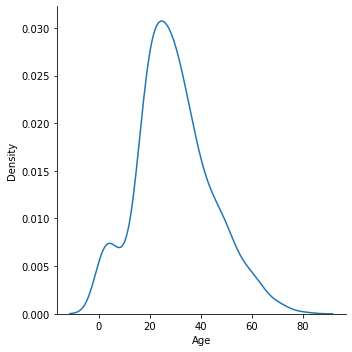

In [214]:
# Kernel density distribution

sns.displot(train_data, x= "Age", kind="kde")

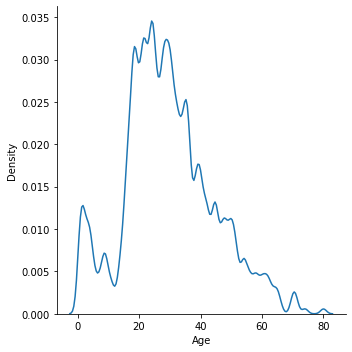

In [215]:
# Smoothing badwith - it is the best option to check the robustness of thee estimate 
                    # is to adjust the default bandwith

sns.displot(train_data, x= "Age", kind="kde", bw_adjust=.25)

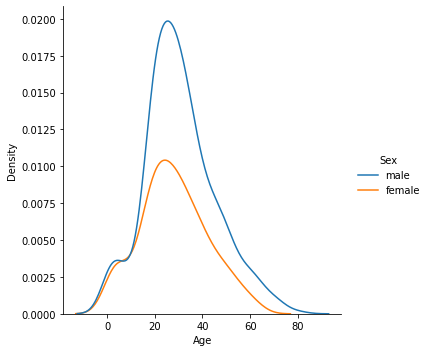

In [216]:
#Conditioning on other variables
    # hue variable assigns a separate density estimate one distribution per variable

sns.displot(train_data, x= "Age", kind="kde", hue="Sex")

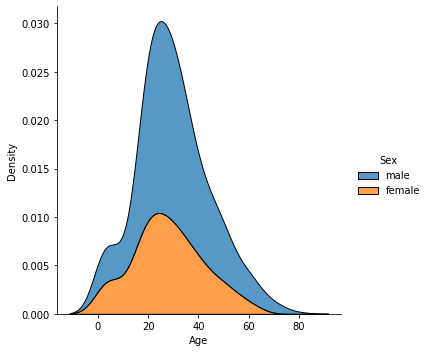

In [217]:
sns.displot(train_data, x= "Age", kind="kde", hue="Sex", multiple="stack")

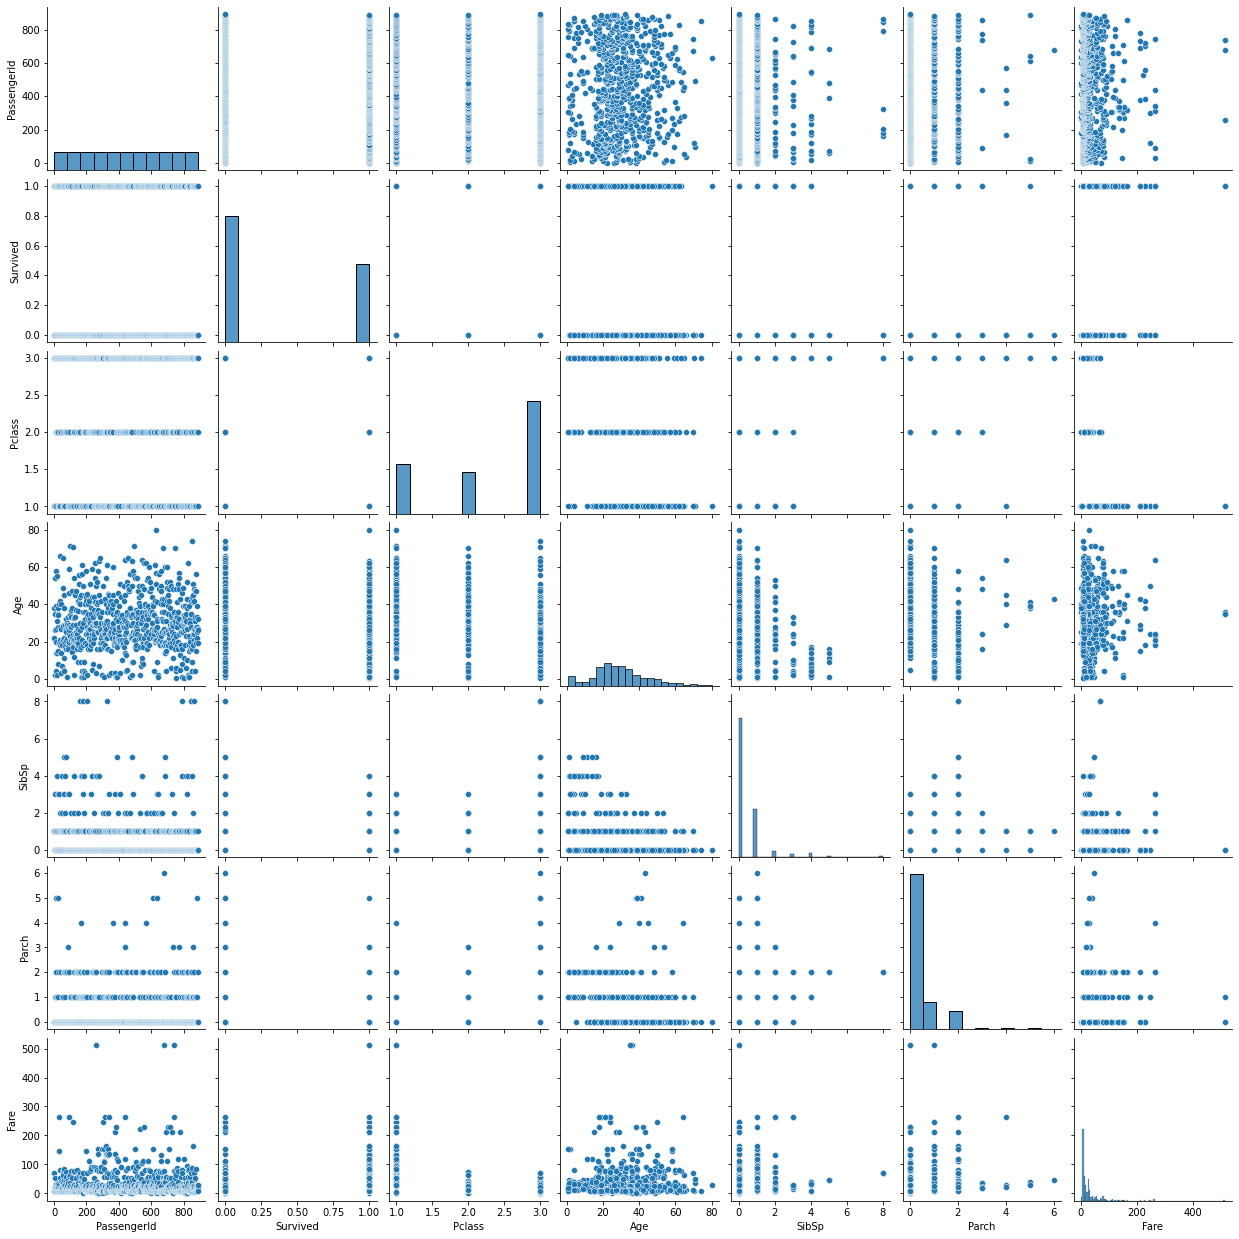

In [218]:
sns.pairplot(train_data)

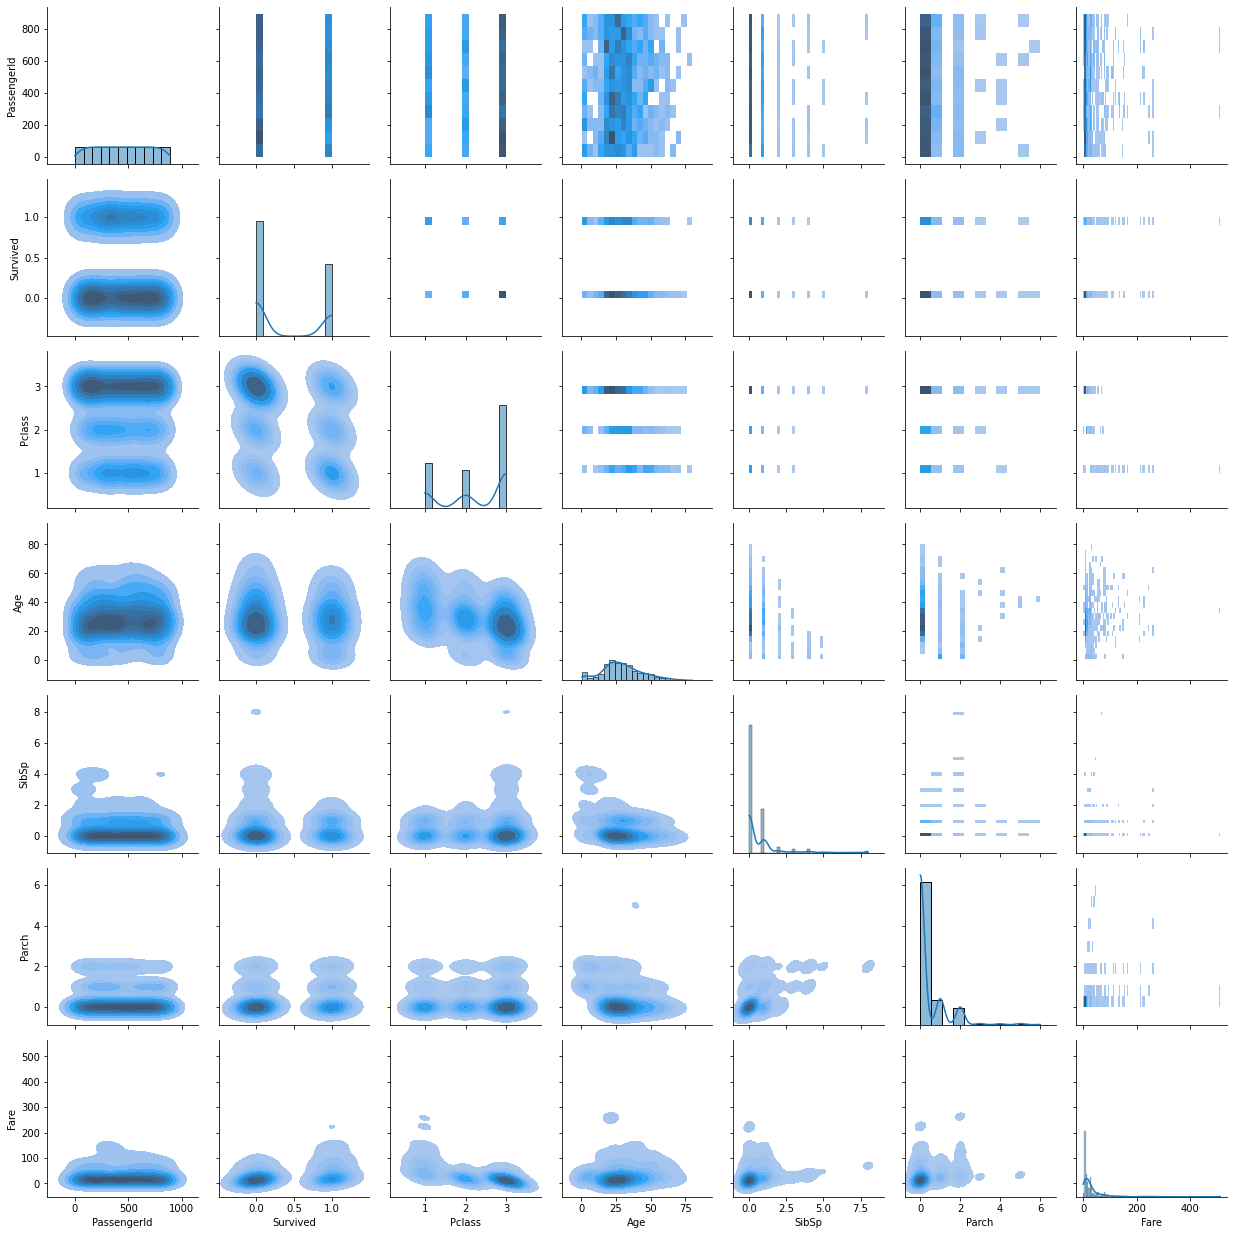

In [219]:
g = sns.PairGrid(train_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

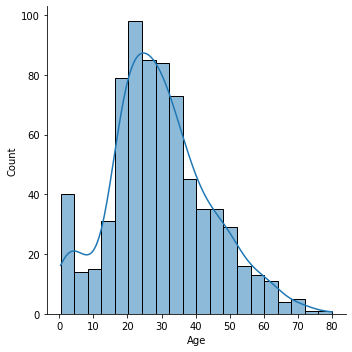

In [220]:
#As a compromise, it is possible to combine these two approaches. 
#While in histogram mode, displot() (as with histplot()) has the option of including the smoothed KDE curve (note kde=True, not kind="kde"):



sns.displot(train_data, x="Age", kde=True)

## Analizing Parch
#### The number of parents and children 

In [225]:
# How many parents and cildren the passenger has onboard?
train_data.Parch.value_counts()

# it means there up to 6 family memebers per passenger (category) and it shows, which
# category is larger in number

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [226]:
# The nuber of missing values
train_data.Parch.isnull().sum()

0

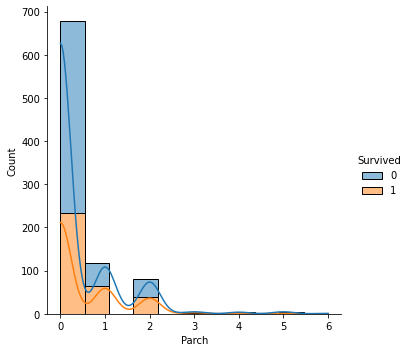

In [237]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
sns.displot(train_data, x= "Parch", hue="Survived", multiple="stack",kde=True)


<AxesSubplot:xlabel='count', ylabel='Parch'>

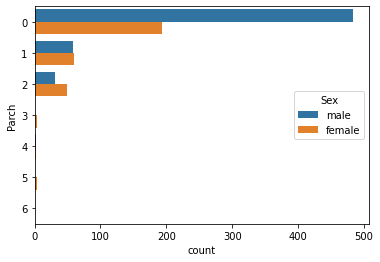

In [233]:
sns.countplot(y="Parch" , hue="Sex", data=bin_df)




# THe graph tells that: the mayority of male Parents died, And more female parents survided


## Analyzing Ticket

In [240]:
train_data.Ticket.isnull().sum()

0

In [254]:
train_data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [256]:
train_data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

####### The number os tickets is 681 

# Analysing Fare

In [259]:
train_data.Fare.isnull().sum()

0

In [269]:
# Number of fares
fares=train_data.Fare.value_counts()

print("The number of different fares is: {}".format(len(train_data.Fare.unique())))

The number of different fares is: 248


<AxesSubplot:xlabel='count', ylabel='Fare'>

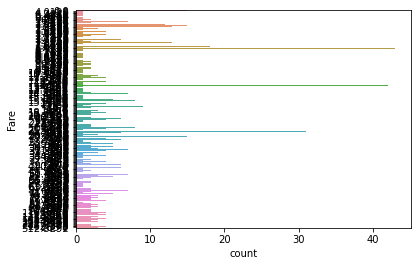

In [267]:
sns.countplot(y="Fare", data=train_data)



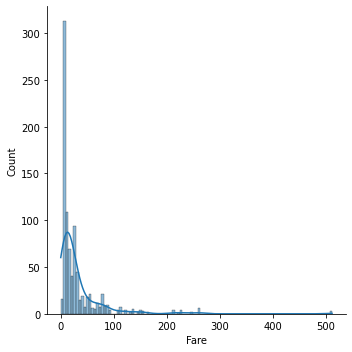

In [266]:
sns.displot(train_data, x= "Fare", multiple="stack",kde=True)


## Analysis on Cabin

In [272]:
# Number of missing values
train_data.Cabin.isnull().sum()

687

In [275]:
train_data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [276]:
print("The number of different Cabins is {}".format(len(train_data.Cabin.unique())))

The number of different Cabins is 148


## Analysis of Embarked

In [302]:
columns= list(train_data.columns)
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Splited_names']

In [301]:
for col in train_data:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
Splited_names


In [304]:
# Missing values in Enbarked
train_data.Embarked.isnull().sum()

# two values might not be that signifact, then we drop them

2

In [312]:
category= train_data.Embarked.value_counts()
category

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

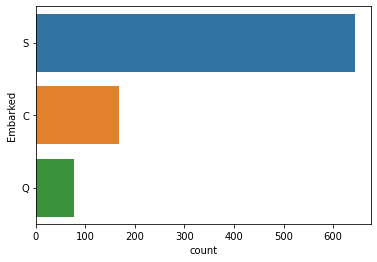

In [313]:
sns.countplot(y="Embarked", data=train_data)

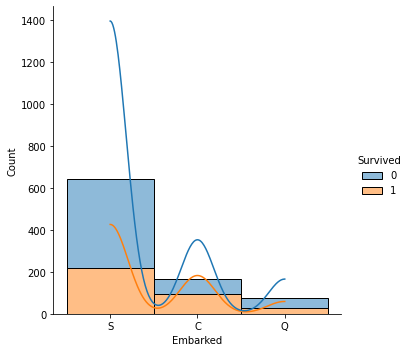

In [314]:
sns.displot(train_data, x= "Embarked", hue="Survived", multiple="stack",kde=True)


In [316]:
# Dropping missing values
train_data.Embarked.isnull().sum()

2

In [317]:
train_data.Embarked.dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [406]:
# Creating new dataframes for ML process

df_clean=train_data 
df_clean.head(5)

,Name,Sex,Ticket,Cabin,Embarked,Splited_names
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,"[Braund, Mr. Owen Harris]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ..."
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,"[Heikkinen, Miss. Laina]"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
4,"Allen, Mr. William Henry",male,373450,NaN,S,"[Allen, Mr. William Henry]"


In [328]:
df_clean = df_clean.dropna(subset=["Embarked"])
df_clean.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splited_names
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]"


In [342]:
# checking there are not missing values
df_clean.Embarked.isnull().sum()

0

## Encoding Features for Machine Learning using df_clean

In [401]:
# Limit to categorical data
train_data= train_data.select_dtypes(include=[object])


In [402]:
!pip install sklearn
!pip install preprocessing


In [408]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [410]:
#1. Create a LaberEncoder object, 
# which will turn all labels in each feature 
# to numbers. 
# Example: ['cat','dog','fish'] = [0,1,2]

le= LabelEncoder()

In [417]:
ohe_cols= train_data.columns.tolist()
ohe_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Splited_names']

In [422]:
train_data.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Splited_names'], dtype='object')

In [423]:
col

'Name'

In [425]:
# For each feature in df, apply the LaberEncoder´s 
# fit_transform function, which fisrt learn the labels for the
# feature (fit) and change the labels to numbers (transform).

for columns in train_data:
    train_data[columns]= le.fit_transform(train_data)
      

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [405]:
df_cleaned= df_clean
df_cleaned.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splited_names
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]"


In [363]:
# Preparing dataframes to be encoded

df_cleaned = df_cleaned[["Survived","Pclass","Sex", "SibSp", "Parch", "Fare", "Embarked"]]

df_cleaned.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [381]:
df_ml_bin= df_cleaned.head(10)
df_ml_bin

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [373]:
df_ml_bin['Fare'] = pd.cut(df_ml_bin['Fare'], bins=5)# discretised


/Users/yazminrodriguez/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
df_ml_bin.Fare.value_counts()

(7.186, 20.057]     3
(45.67, 58.477]     1
(58.477, 71.283]    1
(20.057, 32.863]    0
(32.863, 45.67]     0
Name: Fare, dtype: int64

In [382]:
df_ml_bin.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [385]:
# One-hot encode 
one_hot_cols= df_ml_bin.columns.tolist() #Check the name of columns in a list
#one_hot_cols.remove('Survived')  # Erase the column from the dataframe
one_hot_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [386]:
# Create dummies (depending of the num of classes)

df_ml_bin_enc= pd.get_dummies(df_ml_bin, columns= one_hot_cols)

df_ml_bin_enc

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_3,...,Fare_8.4583,Fare_11.1333,Fare_21.075,Fare_30.0708,Fare_51.8625,Fare_53.1,Fare_71.2833,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
9,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
